<a href="https://colab.research.google.com/github/Rocha212/Senales/blob/main/corte2/parcial2/pregunta%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import os

# Rutas de los audios
ruta_autorizado = "/content/drive/MyDrive/Basetomas/"
ruta_pruebas = "/content/drive/MyDrive/Audios_Usuarios/"

# Función para obtener la FFT de un audio
def obtener_fft(audio_path, longitud_fija=10000):
    y, sr = librosa.load(audio_path, sr=None)
    fft = np.abs(np.fft.fft(y))[:len(y)//2]  # FFT (solo la parte positiva)

    if len(fft) < longitud_fija:
        fft = np.pad(fft, (0, longitud_fija - len(fft)))
    else:
        fft = fft[:longitud_fija]

    return fft

# Obtener la huella vocal del autorizado
archivos_autorizado = [os.path.join(ruta_autorizado, archivo) for archivo in os.listdir(ruta_autorizado) if archivo.endswith(".wav")]
espectros_autorizado = [obtener_fft(archivo) for archivo in archivos_autorizado]
huella_vocal = np.mean(espectros_autorizado, axis=0)  # Huella vocal autorizada

# Función para comparar un nuevo audio con la huella vocal
def comparar_audio(audio_path, huella_vocal):
    fft_audio = obtener_fft(audio_path)
    diferencia = np.linalg.norm(huella_vocal - fft_audio)  # Distancia euclidiana
    return diferencia, fft_audio  # Retornamos la diferencia y la FFT individual

# Comparar audios de prueba
archivos_prueba = [os.path.join(ruta_pruebas, archivo) for archivo in os.listdir(ruta_pruebas) if archivo.endswith(".wav")]

umbral = 3500
diferencias = {}  # Diccionario para almacenar las diferencias

for archivo in archivos_prueba:
    diferencia, fft_audio = comparar_audio(archivo, huella_vocal)
    diferencias[archivo] = diferencia
    print(f"🔎 Audio: {archivo}")
    print(f"   - Diferencia con huella vocal: {diferencia:.2f}")
    print(f"   - FFT (primeros 10 valores): {fft_audio[:10]}\n")  # Mostrar primeros valores de FFT

# Ordenar y mostrar diferencias en orden ascendente
print("\n📊 Comparación de todas las diferencias:")
for archivo, dif in sorted(diferencias.items(), key=lambda x: x[1]):
    print(f"{archivo}: {dif:.2f}")

for archivo in archivos_prueba:
    diferencia, _ = comparar_audio(archivo, huella_vocal)  # Extraemos solo la diferencia
    if diferencia < umbral:
        print(f"✅ ACCESO CONCEDIDO para {archivo} (diferencia: {diferencia:.2f})")
    else:
        print(f"❌ ACCESO DENEGADO para {archivo} (diferencia: {diferencia:.2f})")




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Basetomas/'

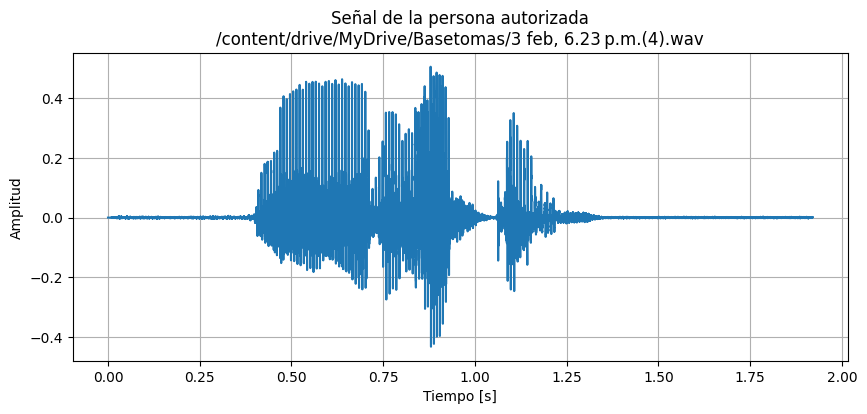

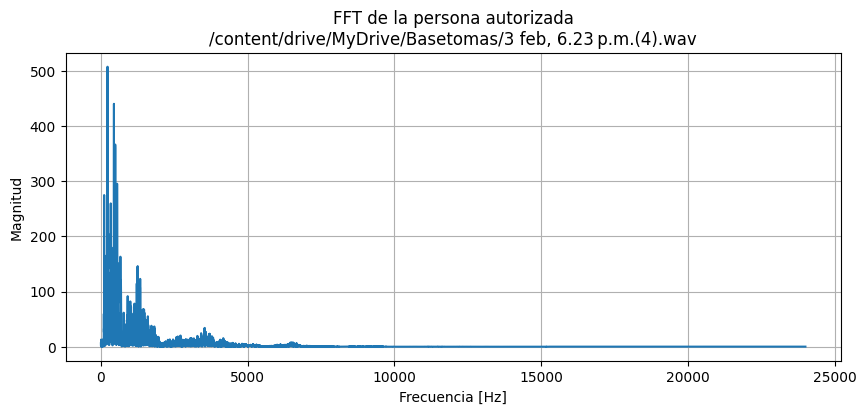

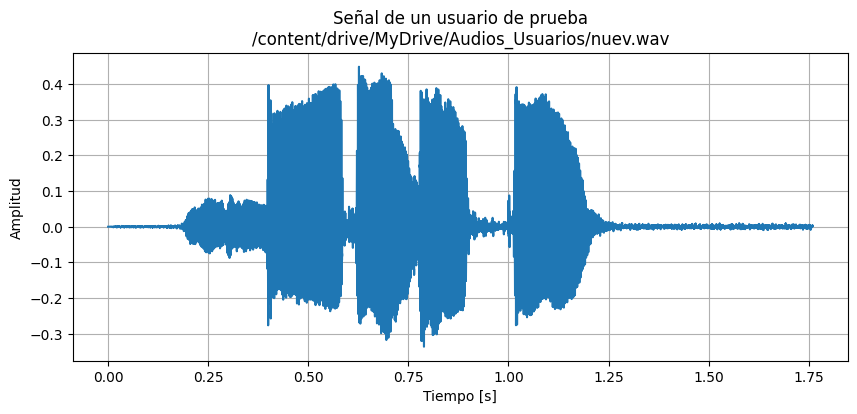

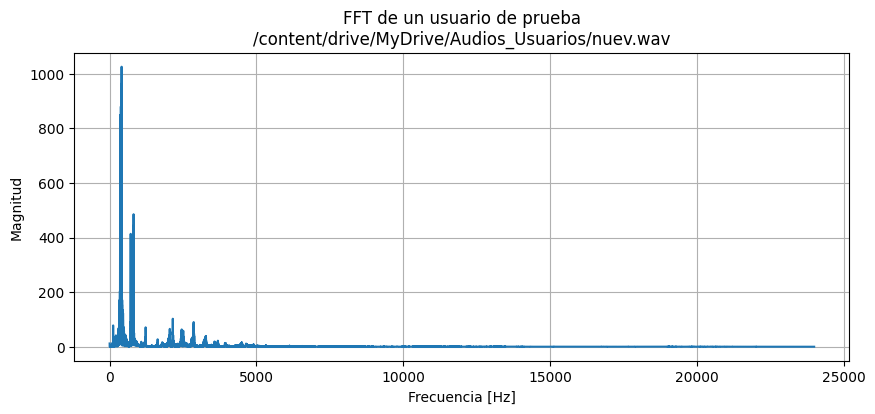

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Rutas de los audios
ruta_autorizado = "/content/drive/MyDrive/Basetomas/"
ruta_pruebas = "/content/drive/MyDrive/Audios_Usuarios/"

# Función para cargar y graficar la señal en el dominio del tiempo
def graficar_senal(audio_path, titulo="Señal en el dominio del tiempo"):
    y, sr = librosa.load(audio_path, sr=None)  # Cargar audio
    t = np.arange(0, len(y)) / sr  # Eje de tiempo

    plt.figure(figsize=(10, 4))
    plt.plot(t, y)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.title(f'{titulo}\n{audio_path}')
    plt.grid()
    plt.show()

# Función para calcular y graficar la FFT de un audio
def graficar_fft(audio_path, titulo="Transformada de Fourier"):
    y, sr = librosa.load(audio_path, sr=None)  # Cargar audio
    fft_values = np.fft.fft(y)  # Transformada de Fourier
    frequencies = np.fft.fftfreq(len(y), 1/sr)  # Frecuencias asociadas

    magnitude = np.abs(fft_values)  # Magnitud de la FFT

    plt.figure(figsize=(10, 4))
    plt.plot(frequencies[:len(y)//2], magnitude[:len(y)//2])  # Solo la parte positiva
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud')
    plt.title(f'{titulo}\n{audio_path}')
    plt.grid()
    plt.show()

# Obtener la lista de audios de la persona autorizada y de prueba
archivos_autorizado = [os.path.join(ruta_autorizado, archivo) for archivo in os.listdir(ruta_autorizado) if archivo.endswith(".wav")]
archivos_prueba = [os.path.join(ruta_pruebas, archivo) for archivo in os.listdir(ruta_pruebas) if archivo.endswith(".wav")]

# Graficar un audio de la persona autorizada
if archivos_autorizado:
    audio_autorizado = archivos_autorizado[0]  # Tomar el primer archivo de la base de datos
    graficar_senal(audio_autorizado, "Señal de la persona autorizada")
    graficar_fft(audio_autorizado, "FFT de la persona autorizada")
else:
    print("❌ No se encontraron audios de la persona autorizada.")

# Graficar un audio de prueba
if archivos_prueba:
    audio_prueba = archivos_prueba[0]  # Tomar el primer archivo de prueba
    graficar_senal(audio_prueba, "Señal de un usuario de prueba")
    graficar_fft(audio_prueba, "FFT de un usuario de prueba")
else:
    print("❌ No se encontraron audios en la carpeta de pruebas.")


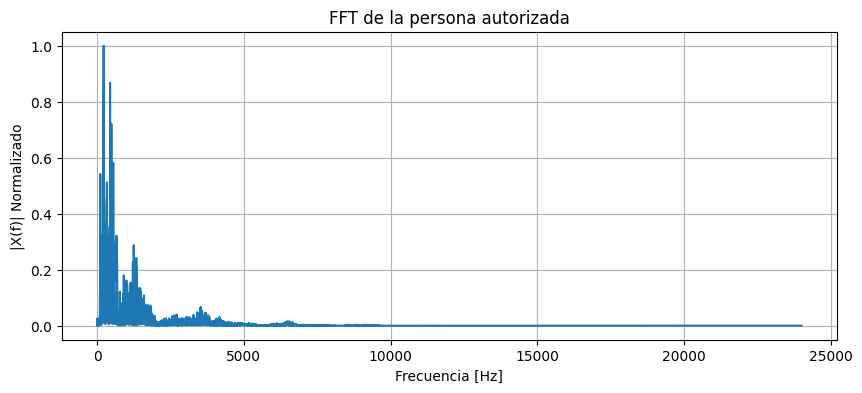

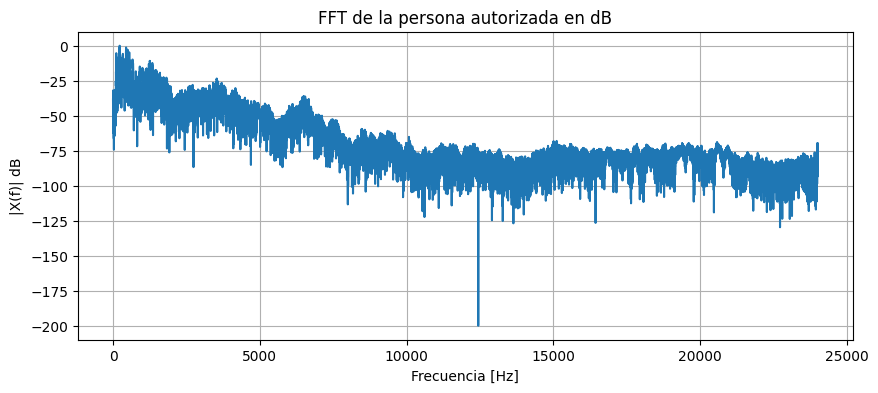

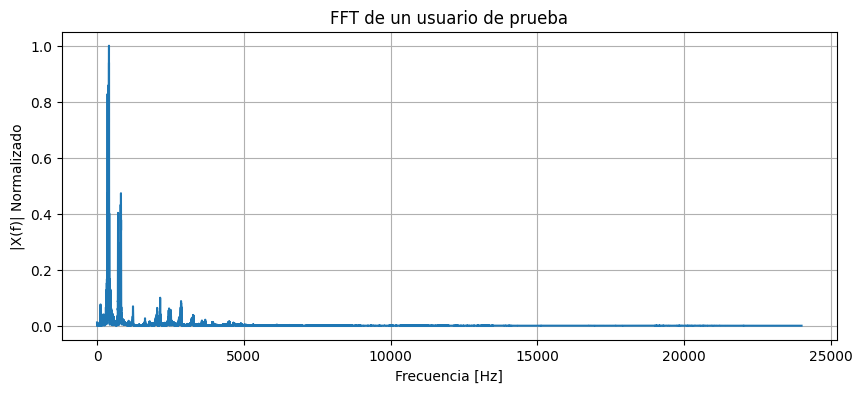

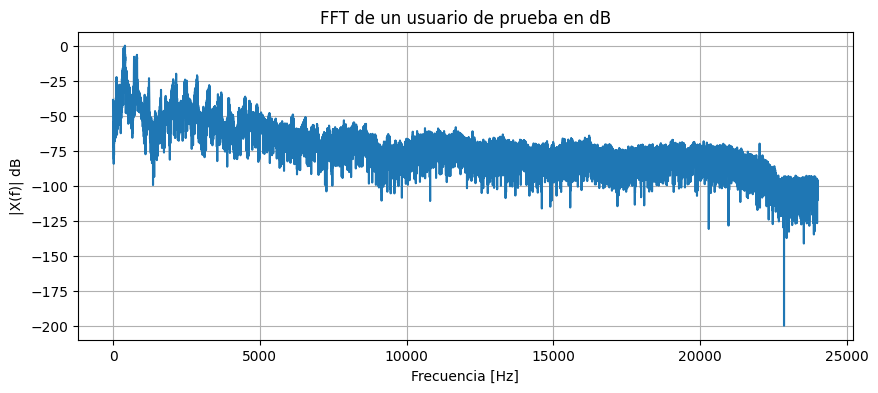

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# Rutas de los audios
ruta_autorizado = "/content/drive/MyDrive/Basetomas/"
ruta_pruebas = "/content/drive/MyDrive/Audios_Usuarios/"

# Función para cargar el audio y calcular su FFT
def calcular_fft(audio_path):
    y, sr = librosa.load(audio_path, sr=None)  # Cargar audio
    Xw = np.fft.fft(y)  # Transformada de Fourier
    vf = np.fft.fftfreq(len(y), 1/sr)  # Frecuencias asociadas
    return Xw, vf

# Función para normalizar y graficar el espectro
def graficar_fft_normalizada(Xw, vf, titulo="Espectro Normalizado"):
    # Normalizar espectro entre 0 y 1
    sca = MinMaxScaler()
    Xw_norm = sca.fit_transform(abs(Xw).reshape(-1, 1)).flatten()

    # Graficar espectro normalizado
    plt.figure(figsize=(10, 4))
    plt.plot(vf[:len(vf)//2], Xw_norm[:len(Xw)//2])
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('|X(f)| Normalizado')
    plt.title(titulo)
    plt.grid()
    plt.show()

    # Graficar espectro en dB
    plt.figure(figsize=(10, 4))
    plt.plot(vf[:len(vf)//2], 20 * np.log10(Xw_norm[:len(Xw)//2] + 1e-10))  # Evitar log(0)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('|X(f)| dB')
    plt.title(f"{titulo} en dB")
    plt.grid()
    plt.show()

# Obtener la lista de audios
archivos_autorizado = [os.path.join(ruta_autorizado, archivo) for archivo in os.listdir(ruta_autorizado) if archivo.endswith(".wav")]
archivos_prueba = [os.path.join(ruta_pruebas, archivo) for archivo in os.listdir(ruta_pruebas) if archivo.endswith(".wav")]

# Procesar y graficar el audio autorizado
if archivos_autorizado:
    audio_autorizado = archivos_autorizado[0]  # Tomar el primer archivo
    Xw_autorizado, vf_autorizado = calcular_fft(audio_autorizado)
    graficar_fft_normalizada(Xw_autorizado, vf_autorizado, "FFT de la persona autorizada")
else:
    print("❌ No se encontraron audios de la persona autorizada.")

# Procesar y graficar el audio de prueba
if archivos_prueba:
    audio_prueba = archivos_prueba[0]  # Tomar el primer archivo
    Xw_prueba, vf_prueba = calcular_fft(audio_prueba)
    graficar_fft_normalizada(Xw_prueba, vf_prueba, "FFT de un usuario de prueba")
else:
    print("❌ No se encontraron audios en la carpeta de pruebas.")


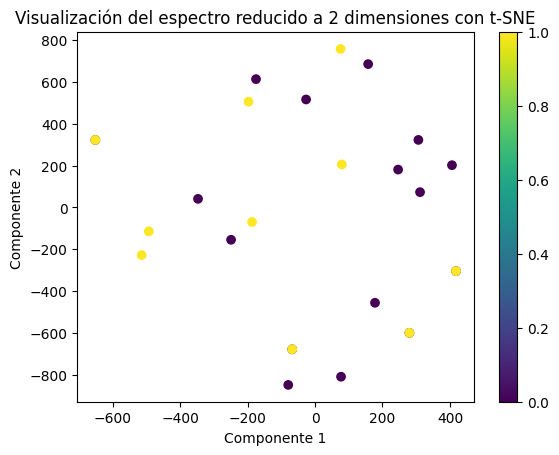

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad (t-SNE o PCA)
def reduccion_dimensionalidad(X, metodo="t-SNE", n_componentes=2, perplexity=5, learning_rate='auto', init='pca'):
    if metodo == "t-SNE":
        red_ = TSNE(perplexity=perplexity, n_components=n_componentes, random_state=123, learning_rate=learning_rate, init=init)
    elif metodo == "PCA":
        red_ = PCA(n_components=n_componentes, random_state=123)
    else:
        raise ValueError("Método no válido. Usa 't-SNE' o 'PCA'.")

    # Aplicar reducción de dimensionalidad
    X_2D = red_.fit_transform(X)
    return X_2D

# Ejecutar reducción de dimensionalidad
X_2D_tsne = reduccion_dimensionalidad(X, metodo="t-SNE")

# Visualización para verificar separación de clases
plt.scatter(X_2D_tsne[:, 0], X_2D_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización del espectro reducido a 2 dimensiones con t-SNE')
plt.colorbar()
plt.show()
